In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

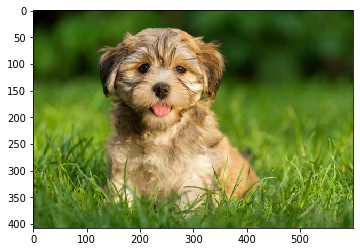

In [9]:
img = cv2.imread('./ASSETS/dog.jpg')
img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

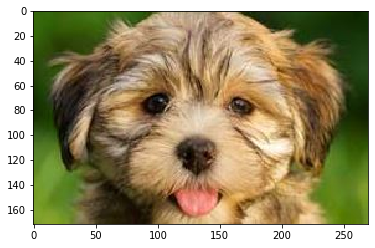

In [10]:
face = cv2.imread('./ASSETS/dog_face.jpg')
face =cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

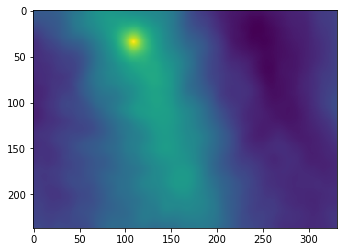

In [25]:
    #one of the 6 template matching alogrithm
    my_method= eval('cv2.TM_CCOEFF')
    copy=  img.copy()
    face2 =face.copy()
    res=cv2.matchTemplate(copy,face2, my_method)
    plt.imshow(res)
    
    #shows the probablity matching cloud, with higher matching index marked as lighter spot(a thermal map)

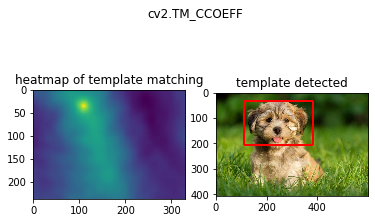

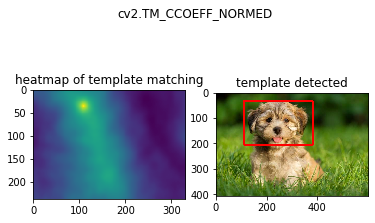

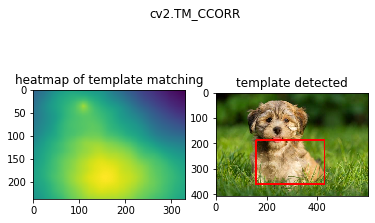

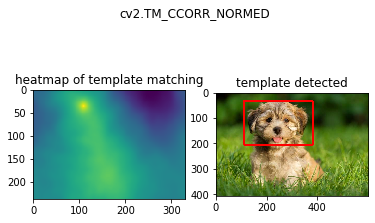

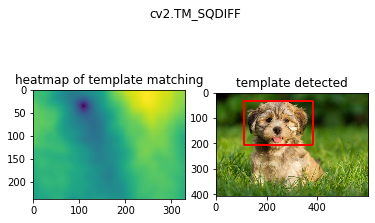

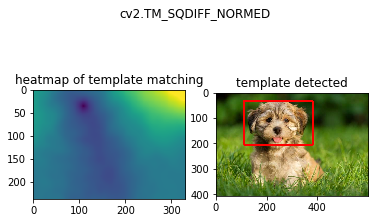

In [30]:
# the eval function evaluates the “String” like a python expression and returns the result as an integer
# All the 6 methods for comparison in a list for template matching

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for m in methods:
    copy =  img.copy()
    method = eval(m)
    
    res=cv2.matchTemplate(copy,face, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else: 
        top_left =max_loc
    
    height, width , channels = face.shape
    bottom_right =(top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(copy, top_left, bottom_right, color= (255,0,0),thickness=5)
    plt.subplot(121)
    plt.imshow(res)
    plt.title('heatmap of template matching')
    
    plt.subplot(122)
    plt.imshow(copy)
    plt.title('template detected')
    plt.suptitle(m) #algorithm title
    plt.show()
    print('\n')
